In [2]:
!git clone --branch colab https://github.com/fizmat/hopfield-tracking /content/hopfield-tracking

Cloning into '/content/hopfield-tracking'...
remote: Enumerating objects: 1949, done.
remote: Counting objects: 100% (1949/1949), done.
remote: Compressing objects: 100% (612/612), done.
remote: Total 1949 (delta 1360), reused 1899 (delta 1317), pack-reused 0
Receiving objects: 100% (1949/1949), 16.45 MiB | 5.88 MiB/s, done.
Resolving deltas: 100% (1360/1360), done.


In [3]:
!pip install -r /content/hopfield-tracking/requirements-colab.txt

  Cloning https://github.com/LAL/trackml-library (to revision master) to /tmp/pip-install-vibwl0k9/trackml_3a744f3c0c864fbcb80f5de0cd3cf60a
  Running command git clone --filter=blob:none --quiet https://github.com/LAL/trackml-library /tmp/pip-install-vibwl0k9/trackml_3a744f3c0c864fbcb80f5de0cd3cf60a
  Resolved https://github.com/LAL/trackml-library to commit 53a165e15a2c885f54c2bef1bd1ed53db6ed9648
  Preparing metadata (setup.py) ... done
  Created wheel for trackml: filename=trackml-3-py2.py3-none-any.whl size=13500 sha256=7b421fb50675ad57643585073c3784ded2a1ccf8b94adeedb6f675e2695eb12a
  Stored in directory: /tmp/pip-ephem-wheel-cache-4l98v3py/wheels/ba/5b/12/14ebc487d5056967e435b7709669dbffb633424e6c39d5a827
Successfully built trackml


In [4]:
!pytest /content/hopfield-tracking

======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.4.4, pluggy-1.3.0
rootdir: /content/hopfield-tracking
configfile: tox.ini
plugins: anyio-3.7.1
collected 62 items / 8 deselected / 54 selected                                                    

hopfield-tracking/datasets/test_bman.py ...                                                  [  5%]
hopfield-tracking/datasets/test_datasets.py .......                                          [ 18%]
hopfield-tracking/datasets/test_simple.py ........                                           [ 33%]
hopfield-tracking/datasets/test_spdsim.py ..                                                 [ 37%]
hopfield-tracking/datasets/test_trackml.py ...                                               [ 42%]
hopfield-tracking/hopfield/test_iterate.py ...                                               [ 48%]
hopfield-tracking/hopfield/energy/test_cross.py .....       

In [5]:
!cd /content/hopfield-tracking/data/trackml && wget https://drive.uni-dubna.ru/index.php/s/qFKLz9Z6Yiw9SN3/download/blacklist_training.zip
!cd /content/hopfield-tracking/data/trackml && wget https://drive.uni-dubna.ru/index.php/s/JybcAq99pmTGwoG/download/train_sample.zip
!cd /content/hopfield-tracking/data/bman && wget https://drive.uni-dubna.ru/index.php/s/zqAcQt8NY35ewdS/download/simdata_ArPb_3.2AGeV_mb_1.zip

--2024-01-15 22:38:13--  https://drive.uni-dubna.ru/index.php/s/qFKLz9Z6Yiw9SN3/download/blacklist_training.zip
Resolving drive.uni-dubna.ru (drive.uni-dubna.ru)... 159.93.167.201
Connecting to drive.uni-dubna.ru (drive.uni-dubna.ru)|159.93.167.201|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11419812 (11M) [application/zip]
Saving to: ‘blacklist_training.zip’

blacklist_training. 100%[===================>]  10.89M  4.82MB/s    in 2.3s    

2024-01-15 22:38:17 (4.82 MB/s) - ‘blacklist_training.zip’ saved [11419812/11419812]

--2024-01-15 22:38:17--  https://drive.uni-dubna.ru/index.php/s/JybcAq99pmTGwoG/download/train_sample.zip
Resolving drive.uni-dubna.ru (drive.uni-dubna.ru)... 159.93.167.201
Connecting to drive.uni-dubna.ru (drive.uni-dubna.ru)|159.93.167.201|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 903185165 (861M) [application/zip]
Saving to: ‘train_sample.zip’

train_sample.zip    100%[===================>] 861.34M  1

In [6]:
cd /content/hopfield-tracking

/content/hopfield-tracking


In [7]:
!pip install vispy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.2 MB/s eta 0:00:00


In [8]:
!pip install jupyter_rfb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.7 MB/s eta 0:00:00


In [9]:
!pip install glfw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.8/211.8 kB 4.0 MB/s eta 0:00:00


In [11]:
import vispy
# selecting sub-backend behind jupyter_rfb:
# 1) pyglfw has high priority if present
# 2) to use any other backend, install then designate as default
# 4) use jupyter_rfb, it then selects the sub-backend according to config
# 5) enable jupyterlab extensions for interactive widget provided by jupyter_rfb

# only needed in jhub2, jhub and jlab-hpc can't run opengl at all, locally auto-selected backend is OK
vispy.config.update(default_backend='egl')
vispy.use('jupyter_rfb')

In [83]:
from segment.candidate import gen_seg_layered
from segment.track import gen_seg_track_layered, gen_seg_track_sequential
from tracking.plot import plot_event, plot_seg_diff
from vispy.scene import SceneCanvas
from datasets import get_hits

canvas = SceneCanvas(bgcolor='white', size=(1000, 1500))
grid = canvas.central_widget.add_grid()

event = get_hits('spdsim')
#grid.add_widget(plot_seg_diff(event, gen_seg_track_layered(event), gen_seg_track_sequential(event)).central_widget)
#grid.add_widget(plot_event(event, gen_seg_track_sequential(event)).central_widget)
#canvas

RFBOutputContext()

/usr/local/lib/python3.10/dist-packages/glfw/__init__.py:916: GLFWError: (65544) b'X11: The DISPLAY environment variable is missing'
  warnings.warn(message, GLFWError)
/usr/local/lib/python3.10/dist-packages/glfw/__init__.py:916: GLFWError: (65537) b'The GLFW library is not initialized'
  warnings.warn(message, GLFWError)


In [84]:
event

,x,y,z,layer,track,event_id
0,260.443682,71.325601,209.577318,1,0,0
1,277.722167,72.454358,217.603183,2,0,0
2,295.230242,73.123290,225.640520,3,0,0
3,312.635706,73.413482,234.079660,4,0,0
4,330.099288,73.279925,241.969470,5,0,0
...,...,...,...,...,...,...
20857,265.573452,-260.990014,1328.673732,6,-1,99
20858,-320.139933,656.776175,-1567.328070,27,-1,99
20859,690.373532,181.057969,-204.845853,26,-1,99
20860,564.954121,515.376814,540.553778,29,-1,99


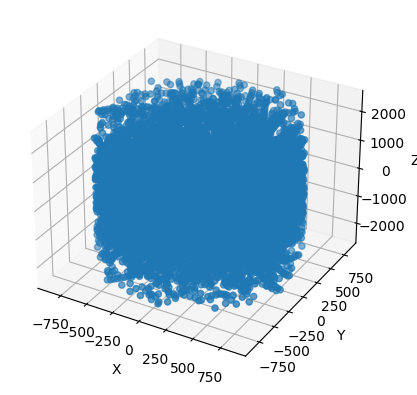

In [85]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def draw_event(df):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    x = df['x']
    y = df['y']
    z = df['z']

    ax.scatter(x, y, z)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()

draw_event(event)

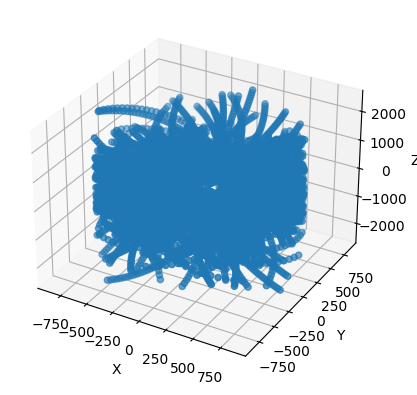

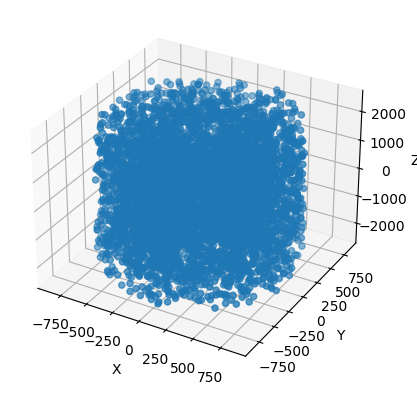

In [86]:
df_track = event.loc[event['track'] >= 0]
df_noise = event.loc[event['track'] == -1]

draw_event(df_track)
draw_event(df_noise)

# Добавить цилиндрические координаты хитов вокруг оси z

In [87]:
from tracking.hit import add_cylindric_coordinates

add_cylindric_coordinates(event)

,x,y,z,layer,track,event_id,r,phi
0,260.443682,71.325601,209.577318,1,0,0,270.033800,0.267308
1,277.722167,72.454358,217.603183,2,0,0,287.017832,0.255200
2,295.230242,73.123290,225.640520,3,0,0,304.151133,0.242796
3,312.635706,73.413482,234.079660,4,0,0,321.139571,0.230642
4,330.099288,73.279925,241.969470,5,0,0,338.135309,0.218451
...,...,...,...,...,...,...,...,...
20857,265.573452,-260.990014,1328.673732,6,-1,99,372.350703,-0.776694
20858,-320.139933,656.776175,-1567.328070,27,-1,99,730.646645,2.024347
20859,690.373532,181.057969,-204.845853,26,-1,99,713.720956,0.256485
20860,564.954121,515.376814,540.553778,29,-1,99,764.713292,0.739539


# Реализовать с помощью любого метода машинного обучения классификацию хитов на настоящие и шумовые.

In [88]:
import numpy as np
y_train = event['track'].to_numpy()
y_train = np.where(y_train >= 0, 1, 0)
y_train

array([1, 1, 1, ..., 0, 0, 0])

In [89]:
df_train = event.drop(['track', 'event_id'], axis=1)
df_train

,x,y,z,layer,r,phi
0,260.443682,71.325601,209.577318,1,270.033800,0.267308
1,277.722167,72.454358,217.603183,2,287.017832,0.255200
2,295.230242,73.123290,225.640520,3,304.151133,0.242796
3,312.635706,73.413482,234.079660,4,321.139571,0.230642
4,330.099288,73.279925,241.969470,5,338.135309,0.218451
...,...,...,...,...,...,...
20857,265.573452,-260.990014,1328.673732,6,372.350703,-0.776694
20858,-320.139933,656.776175,-1567.328070,27,730.646645,2.024347
20859,690.373532,181.057969,-204.845853,26,713.720956,0.256485
20860,564.954121,515.376814,540.553778,29,764.713292,0.739539


In [90]:
x_train = df_train.to_numpy()
x_train

array([[ 2.60443682e+02,  7.13256013e+01,  2.09577318e+02,
         1.00000000e+00,  2.70033800e+02,  2.67307819e-01],
       [ 2.77722167e+02,  7.24543585e+01,  2.17603183e+02,
         2.00000000e+00,  2.87017832e+02,  2.55199576e-01],
       [ 2.95230242e+02,  7.31232904e+01,  2.25640520e+02,
         3.00000000e+00,  3.04151133e+02,  2.42796064e-01],
       ...,
       [ 6.90373532e+02,  1.81057969e+02, -2.04845853e+02,
         2.60000000e+01,  7.13720956e+02,  2.56484611e-01],
       [ 5.64954121e+02,  5.15376814e+02,  5.40553778e+02,
         2.90000000e+01,  7.64713292e+02,  7.39539485e-01],
       [-2.63810510e+02,  6.62880975e+02, -1.58705756e+03,
         2.60000000e+01,  7.13447386e+02,  1.94955639e+00]])

## Генерация тестового датасета

In [91]:
from segment.candidate import gen_seg_layered
from segment.track import gen_seg_track_layered, gen_seg_track_sequential
from tracking.plot import plot_event, plot_seg_diff
from vispy.scene import SceneCanvas
from tracking.hit import add_cylindric_coordinates
from datasets import get_hits

canvas = SceneCanvas(bgcolor='white', size=(1000, 1500))
grid = canvas.central_widget.add_grid()

event_test = get_hits('spdsim', 1)
add_cylindric_coordinates(event_test)

RFBOutputContext()

/usr/local/lib/python3.10/dist-packages/glfw/__init__.py:916: GLFWError: (65544) b'X11: The DISPLAY environment variable is missing'
  warnings.warn(message, GLFWError)
/usr/local/lib/python3.10/dist-packages/glfw/__init__.py:916: GLFWError: (65537) b'The GLFW library is not initialized'
  warnings.warn(message, GLFWError)


,x,y,z,layer,track,event_id,r,phi
0,128.256476,237.573122,435.445776,1,0,0,269.982800,1.075771
1,128.645154,256.637783,459.958492,2,0,0,287.075821,1.106132
2,128.035385,275.832232,484.036682,3,0,0,304.099457,1.136214
3,126.354784,295.214722,508.426766,4,0,0,321.118769,1.166379
4,123.618930,314.661157,532.571978,5,0,0,338.072897,1.196457
...,...,...,...,...,...,...,...,...
119,261.946398,117.301888,951.434879,1,-1,0,287.011582,0.421030
120,-137.560678,-665.432962,-1998.930606,24,-1,0,679.502735,-1.774648
121,-505.387498,-401.236847,-1937.084039,22,-1,0,645.296468,-2.470571
122,-485.142185,-202.781409,-290.163510,15,-1,0,525.816735,-2.745680


In [92]:
y_test_right  = event_test['track'].to_numpy()
y_test_right = np.where(y_test_right >= 0, 1, 0)
y_test_right

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [93]:
df_test = event_test.drop(['track', 'event_id'], axis=1)
df_test

,x,y,z,layer,r,phi
0,128.256476,237.573122,435.445776,1,269.982800,1.075771
1,128.645154,256.637783,459.958492,2,287.075821,1.106132
2,128.035385,275.832232,484.036682,3,304.099457,1.136214
3,126.354784,295.214722,508.426766,4,321.118769,1.166379
4,123.618930,314.661157,532.571978,5,338.072897,1.196457
...,...,...,...,...,...,...
119,261.946398,117.301888,951.434879,1,287.011582,0.421030
120,-137.560678,-665.432962,-1998.930606,24,679.502735,-1.774648
121,-505.387498,-401.236847,-1937.084039,22,645.296468,-2.470571
122,-485.142185,-202.781409,-290.163510,15,525.816735,-2.745680


In [94]:
x_test = df_test.to_numpy()
x_test

array([[ 1.28256476e+02,  2.37573122e+02,  4.35445776e+02,
         1.00000000e+00,  2.69982800e+02,  1.07577065e+00],
       [ 1.28645154e+02,  2.56637783e+02,  4.59958492e+02,
         2.00000000e+00,  2.87075821e+02,  1.10613220e+00],
       [ 1.28035385e+02,  2.75832232e+02,  4.84036682e+02,
         3.00000000e+00,  3.04099457e+02,  1.13621433e+00],
       [ 1.26354784e+02,  2.95214722e+02,  5.08426766e+02,
         4.00000000e+00,  3.21118769e+02,  1.16637914e+00],
       [ 1.23618930e+02,  3.14661157e+02,  5.32571978e+02,
         5.00000000e+00,  3.38072897e+02,  1.19645708e+00],
       [ 1.19655097e+02,  3.34547149e+02,  5.57053119e+02,
         6.00000000e+00,  3.55301473e+02,  1.22731127e+00],
       [ 1.14688034e+02,  3.54202939e+02,  5.81524306e+02,
         7.00000000e+00,  3.72307758e+02,  1.25765752e+00],
       [ 1.08519177e+02,  3.74131260e+02,  6.05898770e+02,
         8.00000000e+00,  3.89551808e+02,  1.28848685e+00],
       [ 1.01334927e+02,  3.93630430e+02,  6.304

## GradientBosstingClassifier

In [95]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100)
clf.fit(x_train, y_train)

GradientBoostingClassifier()

In [96]:
y_test = clf.predict(x_test)
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [97]:
import pandas as pd

cls = pd.DataFrame(y_test, columns=['cluster'])

df_test = pd.concat([df_test, cls], axis=1)
df_test

,x,y,z,layer,r,phi,cluster
0,128.256476,237.573122,435.445776,1,269.982800,1.075771,1
1,128.645154,256.637783,459.958492,2,287.075821,1.106132,1
2,128.035385,275.832232,484.036682,3,304.099457,1.136214,1
3,126.354784,295.214722,508.426766,4,321.118769,1.166379,1
4,123.618930,314.661157,532.571978,5,338.072897,1.196457,1
...,...,...,...,...,...,...,...
119,261.946398,117.301888,951.434879,1,287.011582,0.421030,0
120,-137.560678,-665.432962,-1998.930606,24,679.502735,-1.774648,0
121,-505.387498,-401.236847,-1937.084039,22,645.296468,-2.470571,0
122,-485.142185,-202.781409,-290.163510,15,525.816735,-2.745680,1


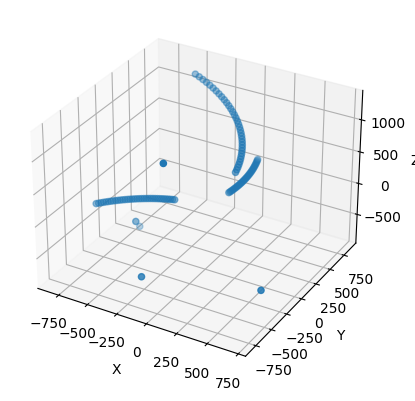

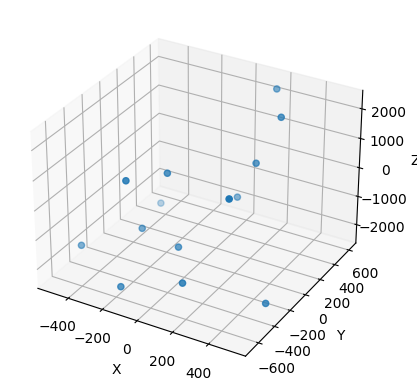

In [98]:
df_track = df_test.loc[df_test['cluster'] == 1]
df_noise = df_test.loc[df_test['cluster'] == 0]

draw_event(df_track)
draw_event(df_noise)

## KNeighborsClassifier

In [99]:
df_test = df_test.drop('cluster', axis=1)

In [100]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [101]:
y_test = clf.predict(x_test)
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1])

In [102]:
import pandas as pd

cls = pd.DataFrame(y_test, columns=['cluster'])

df_test = pd.concat([df_test, cls], axis=1)
df_test

,x,y,z,layer,r,phi,cluster
0,128.256476,237.573122,435.445776,1,269.982800,1.075771,1
1,128.645154,256.637783,459.958492,2,287.075821,1.106132,1
2,128.035385,275.832232,484.036682,3,304.099457,1.136214,1
3,126.354784,295.214722,508.426766,4,321.118769,1.166379,1
4,123.618930,314.661157,532.571978,5,338.072897,1.196457,1
...,...,...,...,...,...,...,...
119,261.946398,117.301888,951.434879,1,287.011582,0.421030,0
120,-137.560678,-665.432962,-1998.930606,24,679.502735,-1.774648,0
121,-505.387498,-401.236847,-1937.084039,22,645.296468,-2.470571,0
122,-485.142185,-202.781409,-290.163510,15,525.816735,-2.745680,1


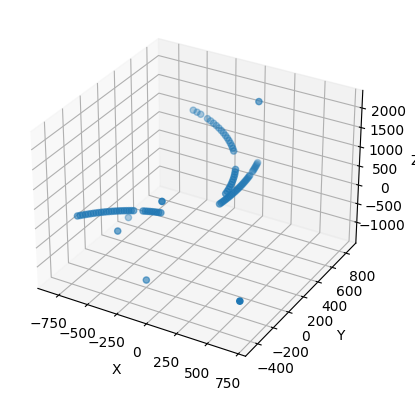

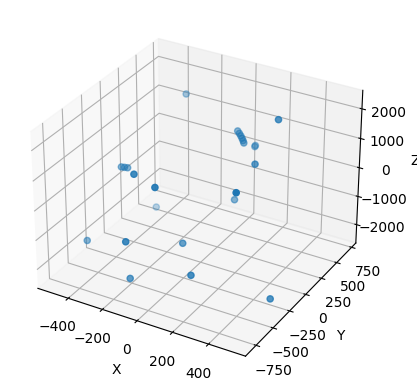

In [103]:
df_track = df_test.loc[df_test['cluster'] == 1]
df_noise = df_test.loc[df_test['cluster'] == 0]

draw_event(df_track)
draw_event(df_noise)

## MLPCLassifier

In [104]:
df_test = df_test.drop('cluster', axis=1)

In [105]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500)
clf.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500)

In [106]:
y_test = clf.predict(x_test)
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1])

In [107]:
import pandas as pd

cls = pd.DataFrame(y_test, columns=['cluster'])

df_test = pd.concat([df_test, cls], axis=1)
df_test

,x,y,z,layer,r,phi,cluster
0,128.256476,237.573122,435.445776,1,269.982800,1.075771,1
1,128.645154,256.637783,459.958492,2,287.075821,1.106132,1
2,128.035385,275.832232,484.036682,3,304.099457,1.136214,1
3,126.354784,295.214722,508.426766,4,321.118769,1.166379,1
4,123.618930,314.661157,532.571978,5,338.072897,1.196457,1
...,...,...,...,...,...,...,...
119,261.946398,117.301888,951.434879,1,287.011582,0.421030,1
120,-137.560678,-665.432962,-1998.930606,24,679.502735,-1.774648,0
121,-505.387498,-401.236847,-1937.084039,22,645.296468,-2.470571,0
122,-485.142185,-202.781409,-290.163510,15,525.816735,-2.745680,1


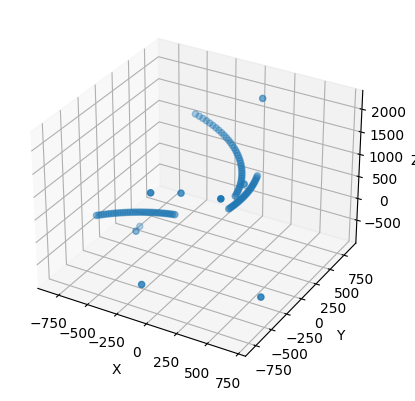

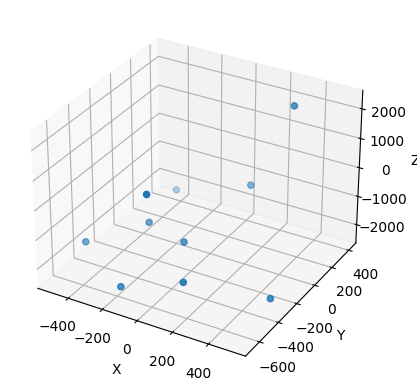

In [108]:
df_track = df_test.loc[df_test['cluster'] == 1]
df_noise = df_test.loc[df_test['cluster'] == 0]

draw_event(df_track)
draw_event(df_noise)

# DecisionTreeClassifier

In [109]:
df_test = df_test.drop('cluster', axis=1)

In [110]:
from sklearn.tree import DecisionTreeClassifier

first_tree = DecisionTreeClassifier(random_state=13, max_depth=2)
first_tree

DecisionTreeClassifier(max_depth=2, random_state=13)

In [111]:
try:
  first_tree.fit(x_train, y_train)
except Exception as e:
  print(e)

In [112]:
prediction = first_tree.predict(x_test)
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

In [113]:
cluster = pd.DataFrame(prediction, columns=['cluster'])
df_test = pd.concat([df_test, cluster], axis=1)
df_test

,x,y,z,layer,r,phi,cluster
0,128.256476,237.573122,435.445776,1,269.982800,1.075771,1
1,128.645154,256.637783,459.958492,2,287.075821,1.106132,1
2,128.035385,275.832232,484.036682,3,304.099457,1.136214,1
3,126.354784,295.214722,508.426766,4,321.118769,1.166379,1
4,123.618930,314.661157,532.571978,5,338.072897,1.196457,1
...,...,...,...,...,...,...,...
119,261.946398,117.301888,951.434879,1,287.011582,0.421030,1
120,-137.560678,-665.432962,-1998.930606,24,679.502735,-1.774648,0
121,-505.387498,-401.236847,-1937.084039,22,645.296468,-2.470571,0
122,-485.142185,-202.781409,-290.163510,15,525.816735,-2.745680,1


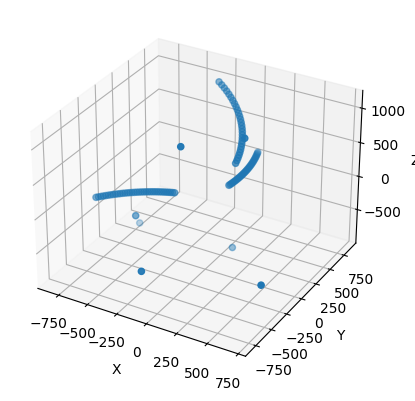

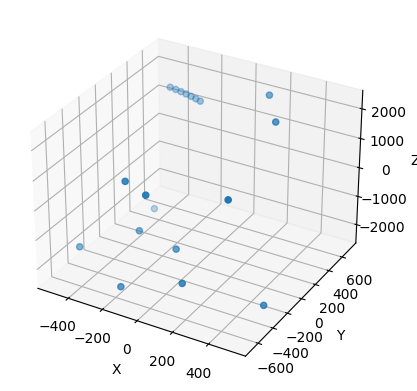

In [114]:
df_track = df_test.loc[df_test['cluster'] == 1]
df_noise = df_test.loc[df_test['cluster'] == 0]

draw_event(df_track)
draw_event(df_noise)

# RandomForestClassifier

In [115]:
df_test = df_test.drop('cluster', axis=1)

In [116]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)

RandomForestClassifier()

In [117]:
y_test = clf.predict(x_test)
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [118]:
import pandas as pd

cls = pd.DataFrame(y_test, columns=['cluster'])

df_test = pd.concat([df_test, cls], axis=1)
df_test

,x,y,z,layer,r,phi,cluster
0,128.256476,237.573122,435.445776,1,269.982800,1.075771,1
1,128.645154,256.637783,459.958492,2,287.075821,1.106132,1
2,128.035385,275.832232,484.036682,3,304.099457,1.136214,1
3,126.354784,295.214722,508.426766,4,321.118769,1.166379,1
4,123.618930,314.661157,532.571978,5,338.072897,1.196457,1
...,...,...,...,...,...,...,...
119,261.946398,117.301888,951.434879,1,287.011582,0.421030,0
120,-137.560678,-665.432962,-1998.930606,24,679.502735,-1.774648,0
121,-505.387498,-401.236847,-1937.084039,22,645.296468,-2.470571,0
122,-485.142185,-202.781409,-290.163510,15,525.816735,-2.745680,1


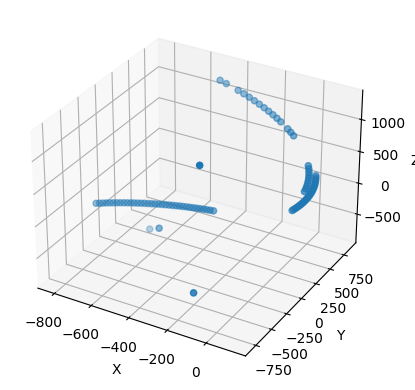

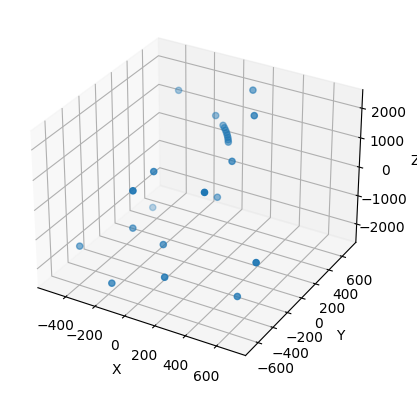

In [119]:
df_track = df_test.loc[df_test['cluster'] == 1]
df_noise = df_test.loc[df_test['cluster'] == 0]

draw_event(df_track)
draw_event(df_noise)